# Tech Challenge

Este Projeto tem como objetivo trazer uma breve análise sobre a população brasileira em relação ao COVID19. <br>
<br>
Os dados foram obtidos diretamente do site da IBGE pelo link: <br>
https://covid19.ibge.gov.br/pnad-covid/

O site do IBGE disponibiliza arquivos mensais, indo de maio até novembro de 2020. <br>
Foi requisitado o uso de 3 meses para análise. A partir disso, foram recolhidos dados referentes aos meses de agosto, setembro e outubro por estes estarem entre os mais recentes e se manterem num mesmo dicionário.

## Tratamento dos Dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('PNAD_COVID_082020.csv',sep=',')
df2 = pd.read_csv('PNAD_COVID_092020.csv',sep=',')
df3 = pd.read_csv('PNAD_COVID_102020.csv',sep=',')

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.reset_index(drop=True, inplace=True)
df

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11.0,NaN,1,4,8,4,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
1,2020,11,11.0,NaN,1,4,8,4,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
2,2020,11,11.0,NaN,1,4,8,4,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
3,2020,11,11.0,NaN,1,4,8,4,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
4,2020,11,11.0,NaN,2,1,8,4,1110011,110015970,...,1,NaN,NaN,1,1,1,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154274,2020,53,53.0,NaN,6,3,10,6,5310220,530009738,...,1,NaN,NaN,1,1,1,2,1,1,3.0
1154275,2020,53,53.0,NaN,6,3,10,6,5310220,530009738,...,1,NaN,NaN,1,1,1,2,1,1,3.0
1154276,2020,53,53.0,NaN,6,3,10,6,5310220,530009738,...,1,NaN,NaN,1,1,1,2,1,1,3.0
1154277,2020,53,53.0,NaN,10,2,10,6,5310220,530009738,...,5,NaN,NaN,1,1,1,1,1,1,2.0


Cada linha do DataFrame corresponde a uma pessoa/residência entrevistada e cada coluna corresponde a um tópico da entrevista. <br>
foi requisitado o uso de, no máximo, 20 questionamentos, envolvendo: <br>
* Caracterização dos sintomas clínicos da população.
* Comportamento da população na época da COVID-19.
* Características ecônomicas da Sociedade.

Colunas com informações como UF e escolaridade serão mantidas por não se tratarem de questionamentos e sim de informações gerais incluídas no DataFrame. O próprio site do IBGE trata apenas como questionário a parte relacionada a saúde e ao trabalho. <br>
<br>
"O questionário se divide em duas partes, sendo uma direcionada a questões de saúde, especificamente sobre sintomas associados à síndrome gripal e outra, a questões de trabalho."<br>
Fonte: https://basedosdados.org/dataset/c747a59f-b695-4d19-82e4-fef703e74c17?table=5dcaf8f0-6509-4dea-958b-4d23bc2a8695

In [ ]:
colunas_selecionadas = [
    'UF', 'V1012', 'V1013', 'V1022', 'V1023',
    'A002', 'A003', 'A004','A005','A006',
    'B0011', 'B0012','B0013', 'B0014','B0015', 'B0016','B0017','B0018', 'B0019','B00110', 'B00111', 'B00112', 'B00113',
    'B002',
    'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036','B0037',
    'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046',
    'B005',
    'B006',
    'B007',
    'B008',
    'B009A','B009C','B009E',
    'B009B', 'B009D', 'B009F',
    'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106',
    'B011',
    'C011A1','C011A2',
    'C011A12', 'C011A22',
    'C007C',
    'C007D',
    'D0011','D0021','D0031','D0041','D0051','D0061','D0071',
    'D0013','D0023','D0033','D0043','D0053','D0063','D0073',
    'F001',
    'F0022'
]

df_resumo = df[colunas_selecionadas]
df_resumo

,UF,V1012,V1013,V1022,V1023,A002,A003,A004,A005,A006,...,D0071,D0013,D0023,D0033,D0043,D0053,D0063,D0073,F001,F0022
0,11,4,8,1,1,36,1,4,5,NaN,...,2,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,1,NaN
1,11,4,8,1,1,30,2,4,7,NaN,...,2,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,1,NaN
2,11,4,8,1,1,13,1,4,2,1.0,...,2,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,1,NaN
3,11,4,8,1,1,11,1,4,2,1.0,...,2,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,1,NaN
4,11,1,8,1,1,57,2,1,2,NaN,...,2,NaN,NaN,NaN,1045.0,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154274,53,3,10,2,1,45,2,4,3,NaN,...,2,NaN,NaN,NaN,NaN,600.0,NaN,NaN,1,NaN
1154275,53,3,10,2,1,22,2,4,7,2.0,...,2,NaN,NaN,NaN,NaN,600.0,NaN,NaN,1,NaN
1154276,53,3,10,2,1,16,2,4,3,1.0,...,2,NaN,NaN,NaN,NaN,600.0,NaN,NaN,1,NaN
1154277,53,2,10,2,1,83,1,1,2,NaN,...,2,1090.0,1090.0,NaN,NaN,NaN,NaN,NaN,5,NaN


O DataFrame possui diversos valores NaN, que segundo as informações no dicionário, correspondem a células vazias correspondente a opção 'Não Aplicável'. Para evitar a ausência de valores e tornar mais fácil o trabalho com as informações, será atribuido a resposta 'Nao_Aplicavel' para evitar quaisquer erros de interpretação.

In [ ]:
# Lista de colunas numéricas que devem ser preenchidas com 0
colunas_numericas = ['C011A12', 'C011A22', 'D0013', 'D0023', 'D0033', 'D0043', 'D0053', 'D0063', 'D0073']

# Preenche valores nulos nas colunas numéricas com 0
df_resumo[colunas_numericas] = df_resumo[colunas_numericas].fillna(0)

# Preenche valores nulos em todas as outras colunas com 'Nao_Aplicavel'
df_resumo.fillna('Nao_Aplicavel', inplace=True)

# Exibe o DataFrame atualizado
df_resumo

<ipython-input-5-6f17e9b805ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resumo[colunas_numericas] = df_resumo[colunas_numericas].fillna(0)
<ipython-input-5-6f17e9b805ef>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nao_Aplicavel' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resumo.fillna('Nao_Aplicavel', inplace=True)
<ipython-input-5-6f17e9b805ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resumo.fillna('Nao_Aplicavel',

,UF,V1012,V1013,V1022,V1023,A002,A003,A004,A005,A006,...,D0071,D0013,D0023,D0033,D0043,D0053,D0063,D0073,F001,F0022
0,11,4,8,1,1,36,1,4,5,Nao_Aplicavel,...,2,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,1,Nao_Aplicavel
1,11,4,8,1,1,30,2,4,7,Nao_Aplicavel,...,2,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,1,Nao_Aplicavel
2,11,4,8,1,1,13,1,4,2,1.0,...,2,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,1,Nao_Aplicavel
3,11,4,8,1,1,11,1,4,2,1.0,...,2,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,1,Nao_Aplicavel
4,11,1,8,1,1,57,2,1,2,Nao_Aplicavel,...,2,0.0,0.0,0.0,1045.0,0.0,0.0,0.0,1,Nao_Aplicavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154274,53,3,10,2,1,45,2,4,3,Nao_Aplicavel,...,2,0.0,0.0,0.0,0.0,600.0,0.0,0.0,1,Nao_Aplicavel
1154275,53,3,10,2,1,22,2,4,7,2.0,...,2,0.0,0.0,0.0,0.0,600.0,0.0,0.0,1,Nao_Aplicavel
1154276,53,3,10,2,1,16,2,4,3,1.0,...,2,0.0,0.0,0.0,0.0,600.0,0.0,0.0,1,Nao_Aplicavel
1154277,53,2,10,2,1,83,1,1,2,Nao_Aplicavel,...,2,1090.0,1090.0,0.0,0.0,0.0,0.0,0.0,5,Nao_Aplicavel


In [ ]:
# Lista das colunas que não devem ser convertidas
colunas_excecao = ['C011A12', 'C011A22', 'D0013', 'D0023', 'D0033', 'D0043', 'D0053', 'D0063', 'D0073']

# Função para converter o valor diretamente para int e depois para str, mantendo valores nulos inalterados
def converter_para_int_str(val):
    if pd.notnull(val):  # Checar se o valor não é nulo
        try:
            return str(int(val))  # Conversão direta para int e, em seguida, para str
        except ValueError:
            return str(val)  # Se não for possível converter para int, mantém como string
    return val  # Manter valores nulos sem alteração

# Aplicar a conversão para todas as colunas, exceto as de exceção
df_resumo = df_resumo.apply(lambda col: col if col.name in colunas_excecao else col.apply(converter_para_int_str))

# Exibir o DataFrame atualizado
print(df_resumo.dtypes)


UF        object
V1012     object
V1013     object
V1022     object
V1023     object
          ...   
D0053    float64
D0063    float64
D0073    float64
F001      object
F0022     object
Length: 76, dtype: object


Será feito um agrupamento entre diversas colunas, para assim, este estudo conter o máximo de informações possíveis em menos espaço. Isso diminui o nível de exatidão das informações e pode tornar incômodo certas pesquisas específicas, porém, gera um conjunto de dados mais parcimonioso.

In [ ]:
# Inicializa a nova coluna 'Sintomas' como uma string vazia
df_resumo['Sintomas'] = ''

# Verifica cada coluna e concatena o número correspondente se o valor for 1
df_resumo['Sintomas'] += np.where(df_resumo['B0011'] == '1', '1,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0012'] == '1', '2,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0013'] == '1', '3,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0014'] == '1', '4,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0015'] == '1', '5,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0016'] == '1', '6,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0017'] == '1', '7,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0018'] == '1', '8,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B0019'] == '1', '9,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B00110'] == '1', '10,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B00111'] == '1', '11,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B00112'] == '1', '12,', '')
df_resumo['Sintomas'] += np.where(df_resumo['B00113'] == '1', '13,', '')

# Se todos os valores das colunas de sintomas forem 2, preenche 'Sintomas' com 14
df_resumo['Sintomas'] = np.where(
    (df_resumo[['B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019',
                'B00110', 'B00111', 'B00112', 'B00113']] == '2').all(axis=1), '14', df_resumo['Sintomas']
)
# Remove a vírgula final e substitui strings vazias por 'Nao_Aplicavelo_Aplicavel'
df_resumo['Sintomas'] = df_resumo['Sintomas'].str.rstrip(',')
df_resumo['Sintomas'] = df_resumo['Sintomas'].replace('', 'Nao_Aplicavel')

In [ ]:
df_resumo['Providencia'] = ''

df_resumo['Providencia'] += np.where(df_resumo['B0031'] == '1', '1,', '')
df_resumo['Providencia'] += np.where(df_resumo['B0032'] == '1', '2,', '')
df_resumo['Providencia'] += np.where(df_resumo['B0033'] == '1', '3,', '')
df_resumo['Providencia'] += np.where(df_resumo['B0034'] == '1', '4,', '')
df_resumo['Providencia'] += np.where(df_resumo['B0035'] == '1', '5,', '')
df_resumo['Providencia'] += np.where(df_resumo['B0036'] == '1', '6,', '')
df_resumo['Providencia'] += np.where(df_resumo['B0037'] == '1', '7,', '')

df_resumo['Providencia'] = np.where(
    (df_resumo[['B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036','B0037']] == '2').all(axis=1), '8', df_resumo['Providencia']
)

df_resumo['Providencia'] = df_resumo['Providencia'].str.rstrip(',')
df_resumo['Providencia'] = df_resumo['Providencia'].replace('', 'Nao_Aplicavel')

In [ ]:
df_resumo['Atendimento'] = ''

df_resumo['Atendimento'] += np.where(df_resumo['B0041'] == '1', '1,', '')
df_resumo['Atendimento'] += np.where(df_resumo['B0042'] == '1', '2,', '')
df_resumo['Atendimento'] += np.where(df_resumo['B0043'] == '1', '3,', '')
df_resumo['Atendimento'] += np.where(df_resumo['B0044'] == '1', '4,', '')
df_resumo['Atendimento'] += np.where(df_resumo['B0045'] == '1', '5,', '')
df_resumo['Atendimento'] += np.where(df_resumo['B0046'] == '1', '6,', '')

df_resumo['Atendimento'] = np.where(
    (df_resumo[['B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046']] == '2').all(axis=1), '7', df_resumo['Atendimento']
)

df_resumo['Atendimento'] = df_resumo['Atendimento'].str.rstrip(',')
df_resumo['Atendimento'] = df_resumo['Atendimento'].replace('', 'Nao_Aplicavel')

In [ ]:
df_resumo['Teste_Tipo'] = ''

df_resumo['Teste_Tipo'] += np.where(df_resumo['B009A'] == '1', '1,', '')
df_resumo['Teste_Tipo'] += np.where(df_resumo['B009C'] == '1', '2,', '')
df_resumo['Teste_Tipo'] += np.where(df_resumo['B009E'] == '1', '3,', '')

df_resumo['Teste_Tipo'] = np.where(
    (df_resumo[['B009A','B009C','B009E']] == '2').all(axis=1), '4', df_resumo['Teste_Tipo']
)

df_resumo['Teste_Tipo'] = df_resumo['Teste_Tipo'].str.rstrip(',')
df_resumo['Teste_Tipo'] = df_resumo['Teste_Tipo'].replace('', 'Nao_Aplicavel')

In [ ]:
conditions = [
    (df_resumo[['B009B', 'B009D', 'B009F']] == '1').any(axis=1),  # Verifica se algum valor é 1
    (df_resumo[['B009B', 'B009D', 'B009F']] == '2').any(axis=1),  # Verifica se algum valor é 2
    (df_resumo[['B009B', 'B009D', 'B009F']] == '3').any(axis=1),  # Verifica se algum valor é 3
    (df_resumo[['B009B', 'B009D', 'B009F']] == '4').any(axis=1),  # Verifica se algum valor é 4
]
choices = [1,2,3,4]
df_resumo['Teste_Resultado'] = np.select(conditions, choices, default='Nao_Aplicavel')

In [ ]:
df_resumo['Diagnostico'] = ''

df_resumo['Diagnostico'] += np.where(df_resumo['B0101'] == '1', '1,', '')
df_resumo['Diagnostico'] += np.where(df_resumo['B0102'] == '1', '2,', '')
df_resumo['Diagnostico'] += np.where(df_resumo['B0103'] == '1', '3,', '')
df_resumo['Diagnostico'] += np.where(df_resumo['B0104'] == '1', '4,', '')
df_resumo['Diagnostico'] += np.where(df_resumo['B0105'] == '1', '5,', '')
df_resumo['Diagnostico'] += np.where(df_resumo['B0106'] == '1', '6,', '')

df_resumo['Diagnostico'] = np.where(
    (df_resumo[['B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106']] == '2').all(axis=1), '7', df_resumo['Diagnostico']
)

df_resumo['Diagnostico'] = df_resumo['Diagnostico'].str.rstrip(',')
df_resumo['Diagnostico'] = df_resumo['Diagnostico'].replace('', 'Nao_Aplicavel')

In [ ]:
# Definindo as condições para a nova coluna 'Tipo de Rendimento'
conditions = [
    (df_resumo['C011A1'] == '1') & (df_resumo['C011A2'] != '1'),  # Apenas a primeira coluna é 1
    (df_resumo['C011A2'] != '1') & (df_resumo['C011A1'] == '1'),  # Apenas a segunda coluna é 1
    (df_resumo['C011A1'] == '1') & (df_resumo['C011A2'] == '1'),  # Ambas as colunas são 1
    (df_resumo['C011A1'] != '1') & (df_resumo['C011A2'] != '1')   # Nenhuma das colunas é 1
]

# Definindo os valores que serão atribuídos com base nas condições
choices = [1, 2, 3, 'Nao_Aplicavel']

# Criando a nova coluna 'Tipo de Rendimento'
df_resumo['Tipo_de_Rendimento'] = np.select(conditions, choices)

In [ ]:
df_resumo['Faixa_Rendimento'] = np.select(
    [
        df_resumo['Tipo_de_Rendimento'] == '1',  # Quando 'Tipo de Rendimento' for 1
        df_resumo['Tipo_de_Rendimento'] == '2',  # Quando 'Tipo de Rendimento' for 2
        df_resumo['Tipo_de_Rendimento'] == '3',  # Quando 'Tipo de Rendimento' for 3
        df_resumo['Tipo_de_Rendimento'] == 'Nao_Aplicavel'   # Quando 'Tipo de Rendimento' for Não aplicável
    ],
    [
        df_resumo['C011A12'],  # Pega o valor da coluna 'C011A12' se 'Tipo de Rendimento' for 1
        df_resumo['C011A22'],  # Pega o valor da coluna 'C011A22' se 'Tipo de Rendimento' for 2
        df_resumo['C011A12'] + df_resumo['C011A22'],  # Soma os valores de 'C011A12' e 'C011A22' se 'Tipo de Rendimento' for 3
        0  # Preenche com Nao_Aplicavel se 'Tipo de Rendimento' for Nao_Aplicavel
    ]
)


In [ ]:
df_resumo['Rendimento_Outras_Fontes'] = ''

df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0011'] == '1', '1,', '')
df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0021'] == '1', '2,', '')
df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0031'] == '1', '3,', '')
df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0041'] == '1', '4,', '')
df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0051'] == '1', '5,', '')
df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0061'] == '1', '6,', '')
df_resumo['Rendimento_Outras_Fontes'] += np.where(df_resumo['D0071'] == '1', '7,', '')

df_resumo['Rendimento_Outras_Fontes'] = np.where(
    (df_resumo[['D0011','D0021','D0031','D0041','D0051','D0061','D0071']] == '2').all(axis=1), '8', df_resumo['Rendimento_Outras_Fontes']
)

df_resumo['Rendimento_Outras_Fontes'] = df_resumo['Rendimento_Outras_Fontes'].str.rstrip(',')
df_resumo['Rendimento_Outras_Fontes'] = df_resumo['Rendimento_Outras_Fontes'].replace('', 'Nao_Aplicavel')

In [ ]:
# Inicializando a nova coluna 'Somatoria' com 0
df_resumo['Somatoria'] = 0

# Verificando os algarismos contidos na coluna 'Rendimento_Outras_Fontes'
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('1'), df_resumo['D0013'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('2'), df_resumo['D0023'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('3'), df_resumo['D0033'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('4'), df_resumo['D0043'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('5'), df_resumo['D0053'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('6'), df_resumo['D0063'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('7'), df_resumo['D0073'], 0)

# Caso o valor em 'Rendimento_Outras_Fontes' seja Nao_Aplicavel, atribui 0 à 'Somatoria'
df_resumo['Somatoria'] = np.where(df_resumo['Rendimento_Outras_Fontes'] == 'Nao_Aplicavel', 0, df_resumo['Somatoria'])


In [ ]:
# Inicializando a nova coluna 'Somatoria' com 0
df_resumo['Somatoria'] = 0

# Convertendo as colunas para numérico
df_resumo['D0013'] = pd.to_numeric(df_resumo['D0013'])
df_resumo['D0023'] = pd.to_numeric(df_resumo['D0023'])
df_resumo['D0033'] = pd.to_numeric(df_resumo['D0033'])
df_resumo['D0043'] = pd.to_numeric(df_resumo['D0043'])
df_resumo['D0053'] = pd.to_numeric(df_resumo['D0053'])
df_resumo['D0063'] = pd.to_numeric(df_resumo['D0063'])
df_resumo['D0073'] = pd.to_numeric(df_resumo['D0073'])

# Verificando os algarismos contidos na coluna 'Rendimento_Outras_Fontes'
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('1'), df_resumo['D0013'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('2'), df_resumo['D0023'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('3'), df_resumo['D0033'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('4'), df_resumo['D0043'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('5'), df_resumo['D0053'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('6'), df_resumo['D0063'], 0)
df_resumo['Somatoria'] += np.where(df_resumo['Rendimento_Outras_Fontes'].str.contains('7'), df_resumo['D0073'], 0)

# Caso o valor em 'Rendimento_Outras_Fontes' seja Nao_Aplicavel, atribui 0 à 'Somatoria'
df_resumo['Somatoria'] = np.where(df_resumo['Rendimento_Outras_Fontes'] == 'Nao_Aplicavel', 0, df_resumo['Somatoria'])

In [ ]:
df_resumo.drop(columns=['B0011', 'B0012','B0013', 'B0014','B0015', 'B0016','B0017','B0018', 'B0019','B00110', 'B00111', 'B00112', 'B00113',
                        'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036','B0037',
                        'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046',
                        'B009A','B009C','B009E',
                        'B009B', 'B009D', 'B009F',
                        'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106',
                        'C011A1','C011A2',
                        'C011A12', 'C011A22',
                        'D0011','D0021','D0031','D0041','D0051','D0061','D0071',
                        'D0013','D0023','D0033','D0043','D0053','D0063','D0073'], inplace=True)

In [ ]:
df_resumo.rename(columns={
    'V1012': 'Semana',
    'V1013': 'Mes',
    'V1022': 'Situacao_domicilio',
    'V1023': 'Area',
    'A002': 'Idade',
    'A003': 'Sexo',
    'A004': 'Raca',
    'A005': 'Escolaridade',
    'A006': 'Frequenta_escola',
    'B002': 'Procurou_PA',
    'B005': 'Internacao',
    'B006': 'Entubacao',
    'B007': 'Plano_de_Saude',
    'B008': 'Teste',
    'B011': 'Restricao',
    'C007C': 'Tipo_de_Trabalho',
    'C007D': 'Principal_Atividade',
    'F001': 'Tipo_de_Imovel',
    'F0022': 'Faixa_Aluguel'

}, inplace=True)

In [ ]:
nova_ordem = ['UF','Semana','Mes','Situacao_domicilio','Area','Idade','Sexo','Raca','Escolaridade','Frequenta_escola',
              'Sintomas','Restricao','Procurou_PA','Providencia','Atendimento','Internacao','Entubacao','Plano_de_Saude','Teste','Teste_Tipo','Teste_Resultado','Diagnostico',
              'Tipo_de_Trabalho','Principal_Atividade','Tipo_de_Rendimento','Faixa_Rendimento',
              'Rendimento_Outras_Fontes','Somatoria',
              'Tipo_de_Imovel','Faixa_Aluguel']

df_resumo = df_resumo[nova_ordem]

In [ ]:
df_resumo

,UF,Semana,Mes,Situacao_domicilio,Area,Idade,Sexo,Raca,Escolaridade,Frequenta_escola,...,Teste_Resultado,Diagnostico,Tipo_de_Trabalho,Principal_Atividade,Tipo_de_Rendimento,Faixa_Rendimento,Rendimento_Outras_Fontes,Somatoria,Tipo_de_Imovel,Faixa_Aluguel
0,11,4,8,1,1,36,1,4,5,Nao_Aplicavel,...,Nao_Aplicavel,7,35,6,1,1045.0,5,1200.0,1,Nao_Aplicavel
1,11,4,8,1,1,30,2,4,7,Nao_Aplicavel,...,Nao_Aplicavel,7,27,6,1,3000.0,5,1200.0,1,Nao_Aplicavel
2,11,4,8,1,1,13,1,4,2,1,...,Nao_Aplicavel,7,Nao_Aplicavel,Nao_Aplicavel,Nao_Aplicavel,0.0,5,1200.0,1,Nao_Aplicavel
3,11,4,8,1,1,11,1,4,2,1,...,Nao_Aplicavel,7,Nao_Aplicavel,Nao_Aplicavel,Nao_Aplicavel,0.0,5,1200.0,1,Nao_Aplicavel
4,11,1,8,1,1,57,2,1,2,Nao_Aplicavel,...,Nao_Aplicavel,7,Nao_Aplicavel,Nao_Aplicavel,Nao_Aplicavel,0.0,4,1045.0,1,Nao_Aplicavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154274,53,3,10,2,1,45,2,4,3,Nao_Aplicavel,...,Nao_Aplicavel,2,2,17,1,1045.0,5,600.0,1,Nao_Aplicavel
1154275,53,3,10,2,1,22,2,4,7,2,...,Nao_Aplicavel,7,8,6,1,1200.0,5,600.0,1,Nao_Aplicavel
1154276,53,3,10,2,1,16,2,4,3,1,...,Nao_Aplicavel,5,Nao_Aplicavel,Nao_Aplicavel,Nao_Aplicavel,0.0,5,600.0,1,Nao_Aplicavel
1154277,53,2,10,2,1,83,1,1,2,Nao_Aplicavel,...,Nao_Aplicavel,"1,2",Nao_Aplicavel,Nao_Aplicavel,Nao_Aplicavel,0.0,"1,2",2180.0,5,Nao_Aplicavel


As informações de algumas colunas do DataFrame ainda serão mantidas como números devido a conterem valores com um grande número de caracteres. Isso pode gerar certa dificuldade na interpretação dos dados durante a análise, contudo isso evitará que quaisquer informações apareçam incompletas devido ao seu tamanho, além do próprio IBGE ja utilizar deste artifício na construção dos dados.<br>
Para facilitar o acesso ao significado das respostas, dicionários serão elaborados para todas as colunas necessárias para facilitar o acesso a essa informação

## Dicionários

In [ ]:
UF = {
    '11': 'RO',  # Rondônia
    '12': 'AC',  # Acre
    '13': 'AM',  # Amazonas
    '14': 'RR',  # Roraima
    '15': 'PA',  # Pará
    '16': 'AP',  # Amapá
    '17': 'TO',  # Tocantins
    '21': 'MA',  # Maranhão
    '22': 'PI',  # Piauí
    '23': 'CE',  # Ceará
    '24': 'RN',  # Rio Grande do Norte
    '25': 'PB',  # Paraíba
    '26': 'PE',  # Pernambuco
    '27': 'AL',  # Alagoas
    '28': 'SE',  # Sergipe
    '29': 'BA',  # Bahia
    '31': 'MG',  # Minas Gerais
    '32': 'ES',  # Espírito Santo
    '33': 'RJ',  # Rio de Janeiro
    '35': 'SP',  # São Paulo
    '41': 'PR',  # Paraná
    '42': 'SC',  # Santa Catarina
    '43': 'RS',  # Rio Grande do Sul
    '50': 'MS',  # Mato Grosso do Sul
    '51': 'MT',  # Mato Grosso
    '52': 'GO',  # Goiás
    '53': 'DF'   # Distrito Federal
}


In [ ]:
# Realiza a troca dos valores de sexo no DataFrame
df_resumo['UF'] = df_resumo['UF'].map(UF)


In [ ]:
Situacao_domicilio = {
    1: 'Área urbana',
    2: 'Área rural',
}

Area = {
    1: 'Capital',
    2: 'Resto da RM (Região Metropolitana, excluindo a capital)',
    3: 'Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital)',
    4: 'Resto da UF  (Unidade da Federação, excluindo a região metropolitana e a RIDE)'
}

Sexo = {
    '1': 'Masculino',
    '2': 'Feminino'
}

Raca = {
    '1': 'Branca',
    '2': 'Preta',
    '3': 'Amarela',
    '4': 'Parda',
    '5': 'Indígena',
    '9': 'Ignorado'
}

Escolaridade = {
    1: 'Sem instrução',
    2: 'Fundamental incompleto',
    3: 'Fundamental completo',
    4: 'Médio incompleto',
    5: 'Médio completo',
    6: 'Superior incompleto',
    7: 'Superior completo',
    8: 'Pós-graduação, mestrado ou doutorado'
}

Frequenta_escola = {
    '1': 'Sim',
    '2': 'Não'

}

In [ ]:
df_resumo['Sexo'] = df_resumo['Sexo'].map(Sexo)
df_resumo['Raca'] = df_resumo['Raca'].map(Raca)
df_resumo['Frequenta_escola'] = df_resumo['Frequenta_escola'].map(Frequenta_escola)

In [ ]:
Sintomas = {
    1: 'Na semana passada teve febre',
    2: 'Na semana passada teve tosse',
    3: 'Na semana passada teve dor de garganta',
    4: 'Na semana passada teve dificuldade para respirar',
    5: 'Na semana passada teve dor de cabeça',
    6: 'Na semana passada teve dor no peito',
    7: 'Na semana passada teve náusea',
    8: 'Na semana passada teve nariz entupido ou escorrendo',
    9: 'Na semana passada teve fadiga',
    10:'Na semana passada teve dor nos olhos',
    11:'Na semana passada teve perda de cheiro ou sabor',
    12:'Na semana passada teve dor muscular',
    13:'Na semana passada teve diarréia',
    14:'Nenhum',
    'Nao_Aplicavel': 'Não aplicável'
}

Restricao = {
    1: 'Não fez restrição, levou vida normal como antes da pandemia',
    2: 'Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas',
    3: 'Ficou em casa e só saiu em caso de necessidade básica',
    4: 'Ficou rigorosamente em casa',
    9: 'Ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Procurou_PA = {
    '1': 'Sim',
    '2': 'Não',
    '9': 'Ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Providencia = {
    1: 'Providencia tomada foi ficar em casa',
    2: 'Providencia tomada foi ligar para algum profissional da saúde',
    3: 'Providencia tomada foi comprar e/ou tomar remédio por conta própria',
    4: 'Providencia tomada foi comprar e/ou tomar remédio por orientação médica',
    5: 'Providencia tomada foi receber visita de algum profissional da saúde do SUS',
    6: 'Providencia tomada foi receber visita de profissional da sáude particular',
    7: 'Outros',
    8: 'Nenhuma',
    9: 'ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Atendimento = {
    1: 'Local que buscou atendimento foi posto de saúde/Unidade básica de saúde/Equipe de saúde da família',
    2: 'Local que buscou atendimento foi pronto socorro do SUS/UPA',
    3: 'Local que buscou atendimento foi hospital do SUS',
    4: 'Local que buscou atendimento foi ambulatório ou consultório privado ou ligado as forças armadas',
    5: 'Local que buscou atendimento foi pronto socorro privado ou ligado as forças armadas',
    6: 'Local que buscou atendimento foi hospital privado ou ligado as forças armadas',
    7: 'Nenhuma',
    9: 'Ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Internacao = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Não foi atendido',
    '9': 'ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Entubacao = {
    '1': 'Sim',
    '2': 'Não',
    '9': 'ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Plano_de_Saude = {
    '1': 'Sim',
    '2': 'Não',
    '9': 'ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Teste = {
    '1': 'Sim',
    '2': 'Não',
    '9': 'ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Teste_Tipo = {
    1: 'Fez o exame coletado com cotonete na boca e/ou nariz (SWAB)',
    2: 'Fez o exame de coleta com sangue através de furo no dedo',
    3: 'Fez o exame de coleta de sangue através da veia no braço',
    4: 'Nenhum',
    9: 'Ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Teste_Resultado = {
    '1': 'Positivo',
    '2': 'Negativo',
    '3': 'Indeterminado',
    '4': 'Ainda não recebeu',
    '9': 'Ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}

Diagnostico = {
    1: 'Algum médico já lhe deu o diagnótico de diabetes',
    2: 'Algum médico já lhe deu o diagnóstico de hipertensão',
    3: 'Algum médico já lhe deu o diagnótico de asma/bronquite/enfisema/doenças respiratórias crônicas ou doença de pulmão',
    4: 'Algum médico já lhe deu o diagnótico de doenças do coração (infarto, angina, insuficiência cardiaca, arritmia)',
    5: 'Algum médico já lhe deu o diagnótico de depressão',
    6: 'Algum médico já lhe deu o diagnótico de câncer',
    7: 'Nenhum',
    9: 'Ignorado',
    'Nao_Aplicavel': 'Não aplicável'
}



In [ ]:
df_resumo['Procurou_PA'] = df_resumo['Procurou_PA'].map(Procurou_PA)
df_resumo['Internacao'] = df_resumo['Internacao'].map(Internacao)
df_resumo['Entubacao'] = df_resumo['Entubacao'].map(Entubacao)
df_resumo['Plano_de_Saude'] = df_resumo['Plano_de_Saude'].map(Plano_de_Saude)
df_resumo['Teste'] = df_resumo['Teste'].map(Teste)
df_resumo['Teste_Resultado'] = df_resumo['Teste_Resultado'].map(Teste_Resultado)

In [ ]:
Tipo_de_Trabalho = {
    1: 'Empregado doméstico, diarista, cozinheiro (em domicílios particulares)',
    2: 'Faxineiro, auxiliar de limpeza etc. (em empresa pública ou privada)',
    3: 'Auxiliar de escritório, escriturário',
    4: 'Secretária, recepcionista',
    5: 'Operador de Telemarketing',
    6: 'Comerciante (dono do bar, da loja etc.)',
    7: 'Balconista, vendedor de loja',
    8: 'Vendedor a domicílio, representante de vendas, vendedor de catálogo (Avon, Natura etc.)',
    9: 'Vendedor ambulante (feirante, camelô, comerciante de rua, quiosque)',
    10: 'Cozinheiro e garçom (de restaurantes, empresas)',
    11: 'Padeiro, açougueiro e doceiro',
    12: 'Agricultor, criador de animais, pescador, silvicultor e jardineiro',
    13: 'Auxiliar da agropecuária (colhedor de frutas, boia fria, etc.)',
    14: 'Motorista (de aplicativo, de taxi, de van, de mototáxi, de ônibus)',
    15: 'Motorista de caminhão (caminhoneiro)',
    16: 'Motoboy',
    17: 'Entregador de mercadorias (de restaurante, de farmácia, de loja, Uber Eats, IFood, Rappy etc.)',
    18: 'Pedreiro, servente de pedreiro, pintor, eletricista, marceneiro',
    19: 'Mecânico de veículos, máquinas industriais etc.',
    20: 'Artesão, costureiro e sapateiro',
    21: 'Cabeleireiro, manicure e afins',
    22: 'Operador de máquinas, montador na indústria',
    23: 'Auxiliar de produção, de carga e descarga',
    24: 'Professor da educação infantil, de ensino fundamental, médio ou superior',
    25: 'Pedagogo, professor de idiomas, música, arte e reforço escolar',
    26: 'Médico, enfermeiro, profissionais de saúde de nível superior',
    27: 'Técnico, profissional da saúde de nível médio',
    28: 'Cuidador de crianças, doentes ou idosos',
    29: 'Segurança, vigilante, outro trabalhador dos serviços de proteção',
    30: 'Policial civil',
    31: 'Porteiro, zelador',
    32: 'Artista, religioso (padre, pastor etc.)',
    33: 'Diretor, gerente, cargo político ou comissionado',
    34: 'Outra profissão de nível superior (advogado, engenheiro, contador, jornalista etc.)',
    35: 'Outro técnico ou profissional de nível médio',
    36: 'Outros'
}

In [ ]:
Principal_Atividade = {
    1: 'Agricultura, pecuária, produção florestal e pesca',
    2: 'Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal etc.',
    3: 'Indústria da transformação (inclusive confecção e fabricação caseira)',
    4: 'Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo',
    5: 'Construção',
    6: 'Comércio no atacado e varejo',
    7: 'Reparação de veículos automotores e motocicletas',
    8: 'Transporte de passageiros',
    9: 'Transporte de mercadorias',
    10: 'Armazenamento, correios e serviços de entregas',
    11: 'Hospedagem (hotéis, pousadas etc.)',
    12: 'Serviço de alimentação (bares, restaurantes, ambulantes de alimentação)',
    13: 'Informação e comunicação (jornais, rádio e televisão, telecomunicações e informática)',
    14: 'Bancos, atividades financeiras e de seguros',
    15: 'Atividades imobiliárias',
    16: 'Escritórios de advocacia, engenharia, publicidade e veterinária (Atividades profissionais, científicas e técnicas)',
    17: 'Atividades de locação de mão de obra, segurança, limpeza, paisagismo e teleatendimento',
    18: 'Administração pública (governo federal, estadual e municipal)',
    19: 'Educação',
    20: 'Saúde humana e assistência social',
    21: 'Organizações religiosas, sindicatos e associações',
    22: 'Atividade artísticas, esportivas e de recreação',
    23: 'Cabeleireiros, tratamento de beleza e serviços pessoais',
    24: 'Serviço doméstico remunerado (será imputado da posição na ocupação)',
    25: 'Outro'
}

Tipo_de_Rendimento = {
    1: 'Rendimento em dinheiro',
    2: 'Rendimento em produtos e mercadorias',
    3: 'Rendimento em produtos e mercadorias e dinheiro',
    'Nao_Aplicavel': 'Não aplicável'
}

In [ ]:
Rendimento_Outras_Fontes = {
    1: 'Rendimento recebido de aposentadoria e pensão',
    2: 'Rendimento recebido de pensão alimentícia, doação ou mesada em dinheiro',
    3: 'Rendimento recebido de bolsa família',
    4: 'Rendimento recebido de benefício assistencial',
    5: 'Rendimento recebido de auxílios emergenciais relacionados ao coronavírus',
    6: 'Rendimento recebido de seguro desemprego',
    7: 'Outros rendimentos, como aluguel, arrendamento, previdencia privada',
    'Nao_Aplicavel': 'Não aplicável'
}


In [ ]:
Tipo_de_Imovel = {
    1: 'Próprio - já pago',
    2: 'Próprio - ainda pagando',
    3: 'Alugado',
    4: 'Cedido por empregador',
    5: 'Cedido por familiar',
    6: 'Cedido de outra forma',
    7: 'Outra condição'
}

Faixa_Aluguel = {
    '00': '1 - 100',
    '01': '101 - 300',
    '02': '301 - 600',
    '03': '601 - 800',
    '04': '801 - 1.600',
    '05': '1.601 - 3.000',
    '06': '3.001 - 10.000',
    '07': '10.001 - 50.000',
    '08': '50.001 - 100.000',
    '09': 'Mais de 100.000',
    '88': 'Aluguel a vencer'
}

## Análise

Para o estudo será utilizado a ferramenta Spark por permitir análises de grande quantidade de dados mais rápida, além de permitir o uso de SQL que é uma linguagem simples e de fácil interpretação.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=b9b9952f67d02c124fa899e60bddc0a2090e86f94df0980565a58e0eeff3f81b
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StringType
from pyspark.sql import Window
from pyspark.sql.functions import row_number
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib.pyplot as plt

In [ ]:
# Iniciando uma sessão do Spark
spark = SparkSession.builder.master("local[*]").appName("DataFrame_SQL").getOrCreate()

# Convertendo o df_resumo para Spark DataFrame
spark_df = spark.createDataFrame(df_resumo)

# Registrar como uma tabela temporária
spark_df.createOrReplaceTempView("tabela_resumo")

Para iniciar nossa análise, será averiguado a parcela da população que procurou algum tipo de serviço de atendimento, levando em consideração, se este atendimento foi feito no serviço público, ou privado, adicionando uma característica econômica que é a posse de algum plano de saúde.

### econômico comportamental

In [ ]:
# Realiza a consulta SQL inicial
resultado = spark.sql('''
SELECT plano_de_saude,
       COUNT(plano_de_saude) AS quantidade
FROM tabela_resumo
GROUP BY plano_de_saude
ORDER BY quantidade DESC
''')

# Calcula o total de todas as quantidades
total_quantidade = resultado.agg(F.sum('quantidade')).collect()[0][0]

# Adiciona a coluna de porcentagem
resultado_com_porcentagem = resultado.withColumn(
    'porcentagem',
    (F.col('quantidade') / total_quantidade * 100).cast('decimal(5,2)')
)

# Exibe o resultado final com a coluna de porcentagem
resultado_com_porcentagem.show()

+--------------+----------+-----------+
|plano_de_saude|quantidade|porcentagem|
+--------------+----------+-----------+
|           Não|    891900|      77.27|
|           Sim|    258660|      22.41|
|      ignorado|      3719|       0.32|
+--------------+----------+-----------+



Num contexto geral, aproximadamente 77% dos entrevistados responderam que não possuem algum tipo de plano de saúde, enquanto aproximadamente 22% responderam que possuem

In [ ]:
Atendimento

{1: 'Local que buscou atendimento foi posto de saúde/Unidade básica de saúde/Equipe de saúde da família',
 2: 'Local que buscou atendimento foi pronto socorro do SUS/UPA',
 3: 'Local que buscou atendimento foi hospital do SUS',
 4: 'Local que buscou atendimento foi ambulatório ou consultório privado ou ligado as forças armadas',
 5: 'Local que buscou atendimento foi pronto socorro privado ou ligado as forças armadas',
 6: 'Local que buscou atendimento foi hospital privado ou ligado as forças armadas',
 7: 'Nenhuma',
 9: 'Ignorado',
 'Nao_Aplicavel': 'Não aplicável'}

In [ ]:
resultado = spark.sql("""
SELECT plano_de_saude,
       atendimento,
       COUNT(atendimento) AS quantidade_atendimento
FROM tabela_resumo
GROUP BY plano_de_saude, atendimento
ORDER BY quantidade_atendimento DESC
""")

# Adiciona a coluna de índice usando monotonically_increasing_id
resultado_com_indice = resultado.withColumn('index', monotonically_increasing_id())

# Exibe o resultado com o índice
resultado_com_indice.show()

+--------------+-------------+----------------------+-----+
|plano_de_saude|  atendimento|quantidade_atendimento|index|
+--------------+-------------+----------------------+-----+
|           Não|Nao_Aplicavel|                882251|    0|
|           Sim|Nao_Aplicavel|                255247|    1|
|           Não|            1|                  4787|    2|
|      ignorado|Nao_Aplicavel|                  3716|    3|
|           Não|            2|                  1723|    4|
|           Não|            3|                  1517|    5|
|           Sim|            6|                   790|    6|
|           Sim|            1|                   723|    7|
|           Sim|            4|                   632|    8|
|           Sim|            5|                   308|    9|
|           Não|            4|                   305|   10|
|           Não|          1,3|                   281|   11|
|           Não|          1,2|                   273|   12|
|           Sim|            3|          

Um número predominante entrevistados apresentou o valor Nao_Aplicavel no tipo de atendimento, indicando que essa informação não era aplicável no momento. Como procuramos valores onde são aplicáveis , essa informação será isolada do restante.


In [ ]:
resultado = spark.sql("""
SELECT plano_de_saude,
       atendimento,
       COUNT(atendimento) AS quantidade_atendimento
FROM tabela_resumo
WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
GROUP BY plano_de_saude, atendimento
ORDER BY quantidade_atendimento DESC
""")

# Exibe o resultado
resultado.show()

+--------------+-----------+----------------------+
|plano_de_saude|atendimento|quantidade_atendimento|
+--------------+-----------+----------------------+
|           Não|          1|                  4787|
|           Não|          2|                  1723|
|           Não|          3|                  1517|
|           Sim|          6|                   790|
|           Sim|          1|                   723|
|           Sim|          4|                   632|
|           Sim|          5|                   308|
|           Não|          4|                   305|
|           Não|        1,3|                   281|
|           Não|        1,2|                   273|
|           Sim|          3|                   252|
|           Sim|          2|                   249|
|           Não|          7|                   196|
|           Não|          6|                   163|
|           Não|        2,3|                   120|
|           Sim|          7|                    94|
|           

In [ ]:
# Realiza a consulta inicial
resultado = spark.sql("""
    SELECT plano_de_saude,
           atendimento
    FROM tabela_resumo
    WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
""")

# Adiciona a coluna 'tipo de atendimento' com base na presença de vírgulas em 'atendimento'
resultado_com_tipo = resultado.withColumn(
    'tipo de atendimento',
    F.when(F.col('atendimento').contains(','), 'multiatendimento')
     .otherwise('atendimento único')
)

# Conta a quantidade de linhas para cada valor de 'tipo de atendimento' e agrupa por 'plano_de_saude' também
resultado_final = resultado_com_tipo.groupBy('plano_de_saude', 'tipo de atendimento').count()

# Calcula o total de linhas para a porcentagem
total_linhas = resultado_final.agg(F.sum('count')).collect()[0][0]

# Renomeia a coluna 'count' para 'quantidade' e adiciona a coluna de porcentagem com duas casas decimais
resultado_final = resultado_final.withColumnRenamed('count', 'quantidade').withColumn(
    'porcentagem',
    F.round((F.col('quantidade') / total_linhas) * 100, 2)
)

# Ordena por 'plano_de_saude'
resultado_final = resultado_final.orderBy('plano_de_saude')

# Exibe o resultado com os ajustes nos nomes das colunas
resultado_final.show()

+--------------+-------------------+----------+-----------+
|plano_de_saude|tipo de atendimento|quantidade|porcentagem|
+--------------+-------------------+----------+-----------+
|           Não|  atendimento único|      8735|      66.86|
|           Não|   multiatendimento|       914|        7.0|
|           Sim|   multiatendimento|       365|       2.79|
|           Sim|  atendimento único|      3048|      23.33|
|      ignorado|  atendimento único|         3|       0.02|
+--------------+-------------------+----------+-----------+



Dentre o total de atendimentos ocorridos nesses 3 meses, segundo as respostas dos entrevistados, aproximadamente 10% foram de multiatendimentos, isto é, procuraram atendimento em mais de uma opção estabelecida na pesquisa. Vale ressaltar que a informação 'atendimento único' não significa o número de atendimentos totais do entrevistado, e sim o número de LOCAIS em que foi procurado atendimento com base nas opções oferecidas no questionário.

In [ ]:
# Isola os dados de multiatendimento
multiatendimento_df = resultado_com_tipo.filter(F.col('tipo de atendimento') == 'multiatendimento')

# Função para classificar os atendimentos
def classificar_atendimento(atendimento):
    # Separa os números presentes na coluna 'atendimento'
    atendimentos = [int(x) for x in atendimento.split(',')]
    # Verifica se os atendimentos são públicos (1, 2, 3) ou privados (4, 5, 6)
    publico = any(x in [1, 2, 3] for x in atendimentos)
    privado = any(x in [4, 5, 6] for x in atendimentos)

    # Retorna a classificação com base nos números presentes
    if publico and privado:
        return 'público-privado'
    elif publico:
        return 'público'
    elif privado:
        return 'privado'
    else:
        return None

# UDF (User Defined Function) para aplicar a lógica da classificação
classificar_atendimento_udf = F.udf(classificar_atendimento)

# Aplica a função de classificação e cria uma nova coluna 'tipo_servico'
multiatendimento_df = multiatendimento_df.withColumn(
    'tipo_servico',
    classificar_atendimento_udf(F.col('atendimento'))
)

# Conta a quantidade de cada tipo de serviço e agrupa por 'plano_de_saude' e 'tipo_servico'
resultado_multi = multiatendimento_df.groupBy('plano_de_saude', 'tipo_servico').count()

# Calcula o total de linhas para a porcentagem
total_multi = resultado_multi.agg(F.sum('count')).collect()[0][0]

# Adiciona a coluna de porcentagem com duas casas decimais
resultado_multi = resultado_multi.withColumn(
    'porcentagem',
    F.round((F.col('count') / total_multi) * 100, 2)
)

# Renomeia a coluna 'count' para 'quantidade'
resultado_multi = resultado_multi.withColumnRenamed('count', 'quantidade')

# Ordena por 'plano_de_saude'
resultado_multi = resultado_multi.orderBy('plano_de_saude')

# Exibe o resultado final com a coluna 'plano_de_saude' no início e 'porcentagem' no final
resultado_multi.show()

+--------------+---------------+----------+-----------+
|plano_de_saude|   tipo_servico|quantidade|porcentagem|
+--------------+---------------+----------+-----------+
|           Não|público-privado|       136|      10.63|
|           Não|        público|       761|       59.5|
|           Não|        privado|        17|       1.33|
|           Sim|        privado|        84|       6.57|
|           Sim|público-privado|       154|      12.04|
|           Sim|        público|       127|       9.93|
+--------------+---------------+----------+-----------+



Dentre os valores de multiatendimento, é perceptível que, em sua maioria, no caso de entrevistados que possuem algum tipo de plano de saúde, procuraram, de maneira exclusiva ou mista, atendimentos no serviço público, enquanto entre os entrevistados que não possuem plano de saúde, a predominância é de multiatendimentos apenas entre opções de serviço público. Contudo, também há parcelas menores entre os dois tipos de entrevistados que procuraram mais de uma forma de atendimento somente sentre serviços privados

In [ ]:
# Realiza a consulta SQL para contar atendimentos
resultado = spark.sql("""
    SELECT plano_de_saude,
           atendimento,
           COUNT(atendimento) AS quantidade_atendimento
    FROM tabela_resumo
    WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
    GROUP BY plano_de_saude, atendimento
    ORDER BY quantidade_atendimento DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado")

# Consulta SQL para separar e contar os valores individuais, renomeando para 'atendimento'
resultado_final = spark.sql("""
    SELECT plano_de_saude,
           TRIM(val) AS atendimento,
           SUM(quantidade_atendimento) AS total_quantidade
    FROM (
        SELECT plano_de_saude,
               TRIM(val) AS val,
               quantidade_atendimento
        FROM resultado
        LATERAL VIEW EXPLODE(SPLIT(atendimento, ',')) exploded AS val
    )
    GROUP BY plano_de_saude, atendimento
    ORDER BY total_quantidade DESC
""")

# Exibe o resultado com a contagem total dos valores individuais e o plano_de_saude
resultado_final.show()

+--------------+-----------+----------------+
|plano_de_saude|atendimento|total_quantidade|
+--------------+-----------+----------------+
|           Não|          1|            5507|
|           Não|          2|            2241|
|           Não|          3|            2046|
|           Sim|          6|             937|
|           Sim|          1|             922|
|           Sim|          4|             754|
|           Não|          4|             399|
|           Sim|          5|             393|
|           Sim|          2|             386|
|           Sim|          3|             382|
|           Não|          6|             219|
|           Não|          7|             196|
|           Sim|          7|              94|
|           Não|          5|              72|
|      ignorado|          3|               2|
|      ignorado|          1|               1|
+--------------+-----------+----------------+



In [ ]:
# Realiza a consulta SQL para contar atendimentos
resultado = spark.sql("""
    SELECT plano_de_saude,
           atendimento,
           COUNT(atendimento) AS quantidade_atendimento
    FROM tabela_resumo
    WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
    GROUP BY plano_de_saude, atendimento
    ORDER BY quantidade_atendimento DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado")

# Função para mapear os valores de atendimento para público, privado, nenhum, ou ignorado
def classificar_atendimento(atendimento):
    atendimentos = [int(x) for x in atendimento.split(',')]
    if 7 in atendimentos:
        return 'nenhum'
    elif 9 in atendimentos:
        return 'ignorado'
    elif all(x in [1, 2, 3] for x in atendimentos):
        return 'público'
    elif all(x in [4, 5, 6] for x in atendimentos):
        return 'privado'
    else:
        return None  # Ignora combinações público-privado

# Registra a função UDF
udf_classificar_atendimento = F.udf(classificar_atendimento, StringType())

# Consulta SQL para separar e contar os valores individuais de atendimento
resultado_final = spark.sql("""
    SELECT plano_de_saude,
           TRIM(val) AS atendimento,
           SUM(quantidade_atendimento) AS total_quantidade
    FROM (
        SELECT plano_de_saude,
               TRIM(val) AS val,
               quantidade_atendimento
        FROM resultado
        LATERAL VIEW EXPLODE(SPLIT(atendimento, ',')) exploded AS val
    )
    GROUP BY plano_de_saude, atendimento
    ORDER BY total_quantidade DESC
""")

# Aplica a função de classificação dos valores de atendimento
resultado_transformado = resultado_final.withColumn(
    'tipo_atendimento', udf_classificar_atendimento(F.col('atendimento'))
).filter(F.col('tipo_atendimento').isNotNull())  # Filtra as linhas que não são público-privado

# Remove a coluna atendimento e mantém a nova coluna classificada
resultado_final_classificado = resultado_transformado.drop('atendimento')

# Agrupa por plano_de_saude e tipo_atendimento, somando as quantidades totais
resultado_agrupado = resultado_final_classificado.groupBy('plano_de_saude', 'tipo_atendimento').agg(
    F.sum('total_quantidade').alias('quantidade_total')
)

# Ordena por plano_de_saude
resultado_ordenado = resultado_agrupado.orderBy('plano_de_saude')

# Exibe o resultado final com os atendimentos categorizados e ordenados
resultado_ordenado.show()


+--------------+----------------+----------------+
|plano_de_saude|tipo_atendimento|quantidade_total|
+--------------+----------------+----------------+
|           Não|          nenhum|             196|
|           Não|         público|            9794|
|           Não|         privado|             690|
|           Sim|          nenhum|              94|
|           Sim|         privado|            2084|
|           Sim|         público|            1690|
|      ignorado|         público|               3|
+--------------+----------------+----------------+



De maneira geral, a pesquisa mostra números bem discrepantes em relação a entrevistados sem plano de saúde que procuraram entre serviços de saúde pública e privada, enquanto entre entrevistados que possuem algum tipo de plano de saúde apresentam uma diferença bem menor entre a procura desses dois tipos de atendimento.

In [ ]:
# Realiza a consulta SQL para contar atendimentos e isola os atendimentos privados
resultado = spark.sql("""
    SELECT plano_de_saude,
           atendimento,
           COUNT(atendimento) AS quantidade_atendimento
    FROM tabela_resumo
    WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
    GROUP BY plano_de_saude, atendimento
    ORDER BY quantidade_atendimento DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado")

# Função para mapear os valores de atendimento (isolando os privados)
def classificar_atendimento(atendimento):
    atendimentos = [int(x) for x in atendimento.split(',')]
    if all(x in [4, 5, 6] for x in atendimentos):
        return 'privado'
    else:
        return None  # Ignora outros tipos

# Registra a função UDF
udf_classificar_atendimento = F.udf(classificar_atendimento, StringType())

# Consulta SQL para separar e contar os valores individuais de atendimento
resultado_final = spark.sql("""
    SELECT plano_de_saude,
           TRIM(val) AS atendimento,
           SUM(quantidade_atendimento) AS total_quantidade
    FROM (
        SELECT plano_de_saude,
               TRIM(val) AS val,
               quantidade_atendimento
        FROM resultado
        LATERAL VIEW EXPLODE(SPLIT(atendimento, ',')) exploded AS val
    )
    GROUP BY plano_de_saude, atendimento
    ORDER BY total_quantidade DESC
""")

# Aplica a função de classificação para isolar os atendimentos privados
resultado_privado = resultado_final.withColumn(
    'tipo_atendimento', udf_classificar_atendimento(F.col('atendimento'))
).filter(F.col('tipo_atendimento') == 'privado')  # Filtra somente os atendimentos privados

# Remove a coluna atendimento e mantém a nova coluna classificada
resultado_privado = resultado_privado.drop('atendimento')

# Calcula a média e o desvio padrão de faixa de rendimento para quem tem e não tem plano de saúde
# A coluna 'Faixa_Rendimento' é considerada para a análise
faixa_rendimento = spark.sql("""
    SELECT plano_de_saude,
           ROUND(AVG(Faixa_Rendimento), 2) AS media_rendimento,
           ROUND(STDDEV(Faixa_Rendimento), 2) AS desvio_padrao_rendimento
    FROM tabela_resumo
    GROUP BY plano_de_saude
""")

# Junta os resultados com a faixa de rendimento e as estatísticas
resultado_com_rendimento = resultado_privado.join(faixa_rendimento, on='plano_de_saude', how='left')

# Agrupa por plano_de_saude e calcula a média e o desvio padrão
resultado_agrupado = resultado_com_rendimento.groupBy('plano_de_saude').agg(
    F.sum('total_quantidade').alias('quantidade_total'),
    F.first('media_rendimento').alias('media_rendimento'),
    F.first('desvio_padrao_rendimento').alias('desvio_padrao_rendimento')
)

# Exibe o resultado final com as estatísticas, sem a coluna tipo_atendimento
resultado_agrupado.select(
    'plano_de_saude',
    'quantidade_total',
    'media_rendimento',
    'desvio_padrao_rendimento'
).orderBy('plano_de_saude').show()


+--------------+----------------+----------------+------------------------+
|plano_de_saude|quantidade_total|media_rendimento|desvio_padrao_rendimento|
+--------------+----------------+----------------+------------------------+
|           Não|             690|          478.65|                 1091.66|
|           Sim|            2084|         1661.88|                 3516.79|
+--------------+----------------+----------------+------------------------+



Entrevistados que procuraram serviços privados de saúde, aqueles que possuem plano de saúde mostram uma renda maior que aqueles que não possuem, contudo apresentam um desvio padrão bem maior, o que indica uma maior dispersão entre valores.

### Clínico

Para parte clínica deste projeto, será averiguado a parcela dos entrevistados que necessitaram de internação e encubação, a porcentagem que apresentaram teste positivo para covid e quais diagnósticos os entrevistados ja apresentaram previamente.

In [ ]:
# Realiza a consulta SQL para contar internações e calcular a quantidade
resultado = spark.sql('''
    SELECT internacao,
           COUNT(internacao) AS quantidade
    FROM tabela_resumo
    WHERE teste_resultado NOT LIKE '%Nao_Aplicavel%'
    GROUP BY internacao
    ORDER BY quantidade DESC
''')

# Calcula o total de internações para a porcentagem
total_internacoes = resultado.agg(F.sum('quantidade')).collect()[0][0]

# Adiciona a coluna de porcentagem
resultado_com_porcentagem = resultado.withColumn(
    'porcentagem',
    F.round((F.col('quantidade') / total_internacoes) * 100, 2)
)

# Exibe o resultado final com a nova coluna de porcentagem
resultado_com_porcentagem.show()


+----------------+----------+-----------+
|      internacao|quantidade|porcentagem|
+----------------+----------+-----------+
|   Não aplicável|   1148022|      99.46|
|             Não|      5557|       0.48|
|             Sim|       634|       0.05|
|Não foi atendido|        63|       0.01|
|        ignorado|         3|        0.0|
+----------------+----------+-----------+



Menos de 1% dos entrevistados afirmaram que necessitaram ser internados durante o período da pesquisa. É interessante observar qual a porcentagem que testaram positivo para o COVID.

In [ ]:
# Realiza a consulta SQL para contar internações e isolar onde internacao = 1
resultado = spark.sql('''
    SELECT teste_resultado,
           COUNT(teste_resultado) AS quantidade
    FROM tabela_resumo
    WHERE internacao = 'Sim'
    GROUP BY teste_resultado
    ORDER BY quantidade DESC
''')

# Calcula o total de internações para a porcentagem
total_internacoes = resultado.agg(F.sum('quantidade')).collect()[0][0]

# Adiciona a coluna de porcentagem
resultado_com_porcentagem = resultado.withColumn(
    'porcentagem',
    F.round((F.col('quantidade') / total_internacoes) * 100, 2)
)

# Exibe o resultado final com a nova coluna de porcentagem
resultado_com_porcentagem.show()


+-----------------+----------+-----------+
|  teste_resultado|quantidade|porcentagem|
+-----------------+----------+-----------+
|         Positivo|       287|      45.27|
|    Não aplicável|       184|      29.02|
|         Negativo|       141|      22.24|
|Ainda não recebeu|        21|       3.31|
|    Indeterminado|         1|       0.16|
+-----------------+----------+-----------+



A pesquisa indica que cerca de 1/3 dos entrevistados que necessitaram de internação durante esse período não atestaram positivo para COVID.

In [ ]:
# Realiza a consulta SQL para contar internações onde teste_resultado = 1
resultado_teste_1 = spark.sql('''
    SELECT entubacao,
           COUNT(entubacao) AS quantidade
    FROM tabela_resumo
    WHERE internacao = 'Sim'
    GROUP BY entubacao
    ORDER BY quantidade DESC
''')

# Calcula o total de internações para a porcentagem
total_internacoes_teste_1 = resultado_teste_1.agg(F.sum('quantidade')).collect()[0][0]

# Adiciona a coluna de porcentagem
resultado_teste_1_com_porcentagem = resultado_teste_1.withColumn(
    'porcentagem',
    F.round((F.col('quantidade') / total_internacoes_teste_1) * 100, 2)
)

# Exibe o resultado final para teste_resultado = 1
resultado_teste_1_com_porcentagem.show()

+---------+----------+-----------+
|entubacao|quantidade|porcentagem|
+---------+----------+-----------+
|      Não|       480|      75.71|
|      Sim|       154|      24.29|
+---------+----------+-----------+



In [ ]:
# Realiza a consulta SQL para contar internações onde teste_resultado = 1
resultado_teste_1 = spark.sql('''
    SELECT entubacao,
           COUNT(entubacao) AS quantidade
    FROM tabela_resumo
    WHERE internacao = 'Sim' AND teste_resultado = 'Positivo'
    GROUP BY entubacao
    ORDER BY quantidade DESC
''')

# Calcula o total de internações para a porcentagem
total_internacoes_teste_1 = resultado_teste_1.agg(F.sum('quantidade')).collect()[0][0]

# Adiciona a coluna de porcentagem
resultado_teste_1_com_porcentagem = resultado_teste_1.withColumn(
    'porcentagem',
    F.round((F.col('quantidade') / total_internacoes_teste_1) * 100, 2)
)

# Exibe o resultado final para teste_resultado = 1
resultado_teste_1_com_porcentagem.show()


+---------+----------+-----------+
|entubacao|quantidade|porcentagem|
+---------+----------+-----------+
|      Não|       189|      65.85|
|      Sim|        98|      34.15|
+---------+----------+-----------+



In [ ]:
# Realiza a consulta SQL para contar internações onde teste_resultado != 1
resultado_teste_nao_1 = spark.sql('''
    SELECT entubacao,
           COUNT(entubacao) AS quantidade
    FROM tabela_resumo
    WHERE internacao = 'Sim' AND teste_resultado != 'Positivo'
    GROUP BY entubacao
    ORDER BY quantidade DESC
''')

# Calcula o total de internações para a porcentagem
total_internacoes_teste_nao_1 = resultado_teste_nao_1.agg(F.sum('quantidade')).collect()[0][0]

# Adiciona a coluna de porcentagem
resultado_teste_nao_1_com_porcentagem = resultado_teste_nao_1.withColumn(
    'porcentagem',
    F.round((F.col('quantidade') / total_internacoes_teste_nao_1) * 100, 2)
)

# Exibe o resultado final para teste_resultado != 1
resultado_teste_nao_1_com_porcentagem.show()


+---------+----------+-----------+
|entubacao|quantidade|porcentagem|
+---------+----------+-----------+
|      Não|       291|      83.86|
|      Sim|        56|      16.14|
+---------+----------+-----------+



Dentre os internados que positivaram para o COVID, cerca de 35% necessitaram ser entubados para respiração artificial, já para os que não positivaram, por volta de 16% precisaram utilizar de aparelhos de respiração. Esse resultado mostra que mesmo num período de pandemia, aproximadamente 36% da aparelhagem foi utilizada entre pacientes entubados que não atestaram positivo para COVID.

In [ ]:
Diagnostico

{1: 'Algum médico já lhe deu o diagnótico de diabetes',
 2: 'Algum médico já lhe deu o diagnóstico de hipertensão',
 3: 'Algum médico já lhe deu o diagnótico de asma/bronquite/enfisema/doenças respiratórias crônicas ou doença de pulmão',
 4: 'Algum médico já lhe deu o diagnótico de doenças do coração (infarto, angina, insuficiência cardiaca, arritmia)',
 5: 'Algum médico já lhe deu o diagnótico de depressão',
 6: 'Algum médico já lhe deu o diagnótico de câncer',
 7: 'Nenhum',
 9: 'Ignorado',
 'Nao_Aplicavel': 'Não aplicável'}

In [ ]:
resultado = spark.sql("""
    SELECT diagnostico,
           COUNT(diagnostico) AS quantidade_diagnostico
    FROM tabela_resumo
    WHERE internacao = 'Sim'
    GROUP BY internacao, diagnostico
    ORDER BY quantidade_diagnostico DESC
""")

resultado.show()

+-----------+----------------------+
|diagnostico|quantidade_diagnostico|
+-----------+----------------------+
|          7|                   223|
|          2|                   102|
|        1,2|                    56|
|          3|                    35|
|        2,4|                    25|
|          1|                    25|
|        2,3|                    15|
|          4|                    15|
|      1,2,4|                    14|
|    1,2,3,4|                    14|
|          5|                    13|
|      2,3,4|                    11|
|        2,5|                     8|
|      1,2,5|                     8|
|          6|                     7|
|        3,4|                     6|
|        1,4|                     6|
|      1,2,3|                     5|
|      2,3,6|                     3|
|1,2,3,4,5,6|                     3|
+-----------+----------------------+
only showing top 20 rows



In [ ]:
# Realiza a consulta SQL para contar diagnósticos relacionados a internações
resultado = spark.sql("""
    SELECT diagnostico,
           COUNT(diagnostico) AS quantidade_diagnostico
    FROM tabela_resumo
    WHERE internacao = 'Sim' AND diagnostico NOT LIKE '%Nao_Aplicavel%'
    GROUP BY diagnostico
    ORDER BY quantidade_diagnostico DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado")

# Calcula o total de diagnósticos para a porcentagem
total_diagnosticos = resultado.agg(F.sum('quantidade_diagnostico')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de diagnóstico
resultado_final = spark.sql("""
    SELECT TRIM(val) AS diagnostico,
           SUM(quantidade_diagnostico) AS total_quantidade
    FROM (
        SELECT TRIM(val) AS val,
               quantidade_diagnostico
        FROM resultado
        LATERAL VIEW EXPLODE(SPLIT(diagnostico, ',')) exploded AS val
    )
    GROUP BY diagnostico
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_diagnosticos) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show()


+-----------+----------------+-----------+
|diagnostico|total_quantidade|porcentagem|
+-----------+----------------+-----------+
|          2|             285|      45.09|
|          7|             223|      35.28|
|          1|             148|      23.42|
|          4|             113|      17.88|
|          3|             110|      17.41|
|          5|              54|       8.54|
|          6|              32|       5.06|
+-----------+----------------+-----------+



dentre os internados, por volta de 35% afirmaram que não receberam diagnóstico algum anteriormente(7). Também vale ressaltar que o diagnóstico mais comum foi hipertensão(2) estando presente em aproximadamente 45% dos casos. Contudo em 64% dos casos de hipertensão estava acompanhando de mais algum diagnóstico, sendo o mais numeroso hipertensão acompanhado de diabetes(1).

In [ ]:
resultado = spark.sql("""
    SELECT diagnostico,
           COUNT(diagnostico) AS quantidade_diagnostico
    FROM tabela_resumo
    WHERE internacao = 'Sim' AND teste_resultado = 'Positivo' AND diagnostico NOT LIKE '%Nao_Aplicavel%'
    GROUP BY diagnostico
    ORDER BY quantidade_diagnostico DESC
""")

resultado.show()

+-----------+----------------------+
|diagnostico|quantidade_diagnostico|
+-----------+----------------------+
|          7|                   109|
|          2|                    59|
|        1,2|                    32|
|          3|                    11|
|          1|                    10|
|        2,4|                     9|
|      1,2,4|                     8|
|          4|                     5|
|        1,4|                     4|
|          5|                     4|
|        2,3|                     4|
|      1,2,5|                     4|
|      2,3,4|                     4|
|        1,3|                     3|
|        3,4|                     2|
|        2,5|                     2|
|      2,3,5|                     2|
|    1,2,3,4|                     2|
|      1,2,3|                     2|
|      1,3,4|                     2|
+-----------+----------------------+
only showing top 20 rows



In [ ]:
# Realiza a consulta SQL para contar diagnósticos relacionados a internações e teste_resultado = 1
resultado = spark.sql("""
    SELECT diagnostico,
           COUNT(diagnostico) AS quantidade_diagnostico
    FROM tabela_resumo
    WHERE internacao = 'Sim' AND teste_resultado = 'Positivo' AND diagnostico NOT LIKE '%Nao_Aplicavel%'
    GROUP BY diagnostico
    ORDER BY quantidade_diagnostico DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado")

# Calcula o total de diagnósticos para a porcentagem
total_diagnosticos = resultado.agg(F.sum('quantidade_diagnostico')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de diagnóstico
resultado_final = spark.sql("""
    SELECT TRIM(val) AS diagnostico,
           SUM(quantidade_diagnostico) AS total_quantidade
    FROM (
        SELECT TRIM(val) AS val,
               quantidade_diagnostico
        FROM resultado
        LATERAL VIEW EXPLODE(SPLIT(diagnostico, ',')) exploded AS val
    )
    GROUP BY diagnostico
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_diagnosticos) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show()


+-----------+----------------+-----------+
|diagnostico|total_quantidade|porcentagem|
+-----------+----------------+-----------+
|          2|             134|      46.85|
|          7|             109|      38.11|
|          1|              69|      24.13|
|          4|              41|      14.34|
|          3|              35|      12.24|
|          5|              16|       5.59|
|          6|               5|       1.75|
+-----------+----------------+-----------+



In [ ]:
# Realiza a consulta SQL para contar diagnósticos relacionados a internações e teste_resultado = 1
resultado = spark.sql("""
    SELECT diagnostico,
           COUNT(diagnostico) AS quantidade_diagnostico
    FROM tabela_resumo
    WHERE internacao = 'Sim' AND teste_resultado != 'Positivo' AND diagnostico NOT LIKE '%Nao_Aplicavel%'
    GROUP BY diagnostico
    ORDER BY quantidade_diagnostico DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado")

# Calcula o total de diagnósticos para a porcentagem
total_diagnosticos = resultado.agg(F.sum('quantidade_diagnostico')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de diagnóstico
resultado_final = spark.sql("""
    SELECT TRIM(val) AS diagnostico,
           SUM(quantidade_diagnostico) AS total_quantidade
    FROM (
        SELECT TRIM(val) AS val,
               quantidade_diagnostico
        FROM resultado
        LATERAL VIEW EXPLODE(SPLIT(diagnostico, ',')) exploded AS val
    )
    GROUP BY diagnostico
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_diagnosticos) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show()

+-----------+----------------+-----------+
|diagnostico|total_quantidade|porcentagem|
+-----------+----------------+-----------+
|          2|             151|      43.64|
|          7|             114|      32.95|
|          1|              79|      22.83|
|          3|              75|      21.68|
|          4|              72|      20.81|
|          5|              38|      10.98|
|          6|              27|        7.8|
+-----------+----------------+-----------+



Quando adicionado o filtro de entrevistados positivados para COVID há algumas mudanças nas proporções, mas nada que altere algum caso específico do mostrado na pesquisa anterior

In [ ]:
df_resumo.Internacao.unique()

array(['Não aplicável', 'Não', 'Sim', 'Não foi atendido', 'ignorado'],
      dtype=object)

In [ ]:
resultado = spark.sql("""
    SELECT diagnostico,
           internacao,
           COUNT(diagnostico) AS quantidade_diagnostico
    FROM tabela_resumo

    GROUP BY diagnostico, internacao
    ORDER BY quantidade_diagnostico DESC
""")
resultado.show()

+-------------+-------------+----------------------+
|  diagnostico|   internacao|quantidade_diagnostico|
+-------------+-------------+----------------------+
|            7|Não aplicável|                873804|
|            2|Não aplicável|                101622|
|            3|Não aplicável|                 39685|
|          1,2|Não aplicável|                 28977|
|            1|Não aplicável|                 20525|
|            5|Não aplicável|                 16191|
|          2,4|Não aplicável|                  9183|
|            4|Não aplicável|                  8453|
|          2,5|Não aplicável|                  5892|
|            6|Não aplicável|                  5303|
|          2,3|Não aplicável|                  5253|
|Nao_Aplicavel|Não aplicável|                  5126|
|        1,2,4|Não aplicável|                  4953|
|            7|          Não|                  3455|
|          3,5|Não aplicável|                  2166|
|          2,6|Não aplicável|                 

A partir dessa pesquisa, fica claro que hipertensão(2) não só é o caso mais comum entre entrevistados internados, como é o diagnóstico que apresentou maior porcentagem de necessidade de internação, seguido de doenças no coração(4).

In [ ]:
# Dicionário com os diagnósticos
diagnostico_dict = {
    1: 'Diabetes',
    2: 'Hipertensão',
    3: 'Asma/bronquite/enfisema/doenças respiratórias crônicas ou doença de pulmão',
    4: 'Doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)',
    5: 'Depressão',
    6: 'Câncer',
    7: 'Nenhum',
    9: 'Ignorado'
}

# Lista de diagnósticos de 1 a 6
diagnosticos = range(1, 7)

# Cria uma lista para armazenar os resultados
resultados_completos = []

for diag in diagnosticos:
    # Realiza a consulta SQL para contar diagnósticos relacionados a internações e teste_resultado = 1
    resultado = spark.sql(f"""
        SELECT internacao,
               COUNT(internacao) AS diagnostico_{diag}
        FROM tabela_resumo
        WHERE teste_resultado = 'Positivo' AND diagnostico LIKE '{diag}'
        GROUP BY internacao
        ORDER BY internacao
    """)

    # Calcula o total de internações para a porcentagem
    total_internacoes = resultado.agg(F.sum(f'diagnostico_{diag}')).collect()[0][0]

    # Adiciona a coluna de porcentagem
    resultado_com_porcentagem = resultado.withColumn(
        'porcentagem',
        F.round((F.col(f'diagnostico_{diag}') / total_internacoes) * 100, 2)
    )

    # Adiciona o resultado à lista
    resultados_completos.append(resultado_com_porcentagem)

# Exibe todos os resultados com os títulos correspondentes
for i, res in enumerate(resultados_completos, start=1):
    titulo = diagnostico_dict.get(i, f'Diagnóstico {i}')
    print(f'Resultados para diagnóstico: {titulo}')
    res.show()


Resultados para diagnóstico: Diabetes
+-------------+-------------+-----------+
|   internacao|diagnostico_1|porcentagem|
+-------------+-------------+-----------+
|          Não|           37|       5.24|
|Não aplicável|          659|      93.34|
|          Sim|           10|       1.42|
+-------------+-------------+-----------+

Resultados para diagnóstico: Hipertensão
+-------------+-------------+-----------+
|   internacao|diagnostico_2|porcentagem|
+-------------+-------------+-----------+
|          Não|          150|       4.97|
|Não aplicável|         2810|      93.05|
|          Sim|           59|       1.95|
|     ignorado|            1|       0.03|
+-------------+-------------+-----------+

Resultados para diagnóstico: Asma/bronquite/enfisema/doenças respiratórias crônicas ou doença de pulmão
+----------------+-------------+-----------+
|      internacao|diagnostico_3|porcentagem|
+----------------+-------------+-----------+
|             Não|           66|       5.62|
|   N

In [ ]:
# Dicionário com os diagnósticos
diagnostico_dict = {
    1: 'Diabetes',
    2: 'Hipertensão',
    3: 'Asma/bronquite/enfisema/doenças respiratórias crônicas ou doença de pulmão',
    4: 'Doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)',
    5: 'Depressão',
    6: 'Câncer',
    7: 'Nenhum',
    9: 'Ignorado'
}

# Lista de diagnósticos de 1 a 6
diagnosticos = range(1, 7)

# Cria uma lista para armazenar os resultados
resultados_completos = []

for diag in diagnosticos:
    # Realiza a consulta SQL para contar diagnósticos relacionados a internações e teste_resultado = 1
    resultado = spark.sql(f"""
        SELECT internacao,
               COUNT(internacao) AS diagnostico_{diag}
        FROM tabela_resumo
        WHERE teste_resultado != 'Positivo' AND diagnostico LIKE '{diag}'
        GROUP BY internacao
        ORDER BY internacao
    """)

    # Calcula o total de internações para a porcentagem
    total_internacoes = resultado.agg(F.sum(f'diagnostico_{diag}')).collect()[0][0]

    # Adiciona a coluna de porcentagem
    resultado_com_porcentagem = resultado.withColumn(
        'porcentagem',
        F.round((F.col(f'diagnostico_{diag}') / total_internacoes) * 100, 2)
    )

    # Adiciona o resultado à lista
    resultados_completos.append(resultado_com_porcentagem)

# Exibe todos os resultados com os títulos correspondentes
for i, res in enumerate(resultados_completos, start=1):
    titulo = diagnostico_dict.get(i, f'Diagnóstico {i}')
    print(f'Resultados para diagnóstico: {titulo}')
    res.show()

Resultados para diagnóstico: Diabetes
+----------------+-------------+-----------+
|      internacao|diagnostico_1|porcentagem|
+----------------+-------------+-----------+
|             Não|           90|       0.45|
|   Não aplicável|        19866|      99.45|
|Não foi atendido|            4|       0.02|
|             Sim|           15|       0.08|
+----------------+-------------+-----------+

Resultados para diagnóstico: Hipertensão
+----------------+-------------+-----------+
|      internacao|diagnostico_2|porcentagem|
+----------------+-------------+-----------+
|             Não|          390|       0.39|
|   Não aplicável|        98812|      99.56|
|Não foi atendido|            5|       0.01|
|             Sim|           43|       0.04|
+----------------+-------------+-----------+

Resultados para diagnóstico: Asma/bronquite/enfisema/doenças respiratórias crônicas ou doença de pulmão
+----------------+-------------+-----------+
|      internacao|diagnostico_3|porcentagem|
+----

### Comportamento

In [ ]:
# Executa a consulta SQL incluindo a porcentagem com duas casas decimais
resultado = spark.sql("""
    SELECT teste,
           COUNT(teste) AS quantidade,
           ROUND((COUNT(teste) / SUM(COUNT(teste)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    GROUP BY teste
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()


+--------+----------+-----------+
|   teste|quantidade|porcentagem|
+--------+----------+-----------+
|     Não|   1035125|      89.68|
|     Sim|    115384|       10.0|
|ignorado|      3770|       0.33|
+--------+----------+-----------+



A pesquisa nos mostra que aproximadamente 90% do entrevistados não fizeram testes de COVID. A partir dessa informação, é interessante adicionar a variável de restrição para entender como adotaram as medidas de restritivas.

In [ ]:
Restricao

{1: 'Não fez restrição, levou vida normal como antes da pandemia',
 2: 'Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas',
 3: 'Ficou em casa e só saiu em caso de necessidade básica',
 4: 'Ficou rigorosamente em casa',
 9: 'Ignorado',
 'Nao_Aplicavel': 'Não aplicável'}

In [ ]:
# Executa a consulta SQL incluindo a porcentagem
resultado = spark.sql("""
    SELECT restricao,
           COUNT(restricao) AS quantidade,
           ROUND((COUNT(restricao) / SUM(COUNT(restricao)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    GROUP BY restricao
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()


+---------+----------+-----------+
|restricao|quantidade|porcentagem|
+---------+----------+-----------+
|        3|    477293|      41.35|
|        2|    444729|      38.53|
|        4|    190169|      16.48|
|        1|     36100|       3.13|
|        9|      5988|       0.52|
+---------+----------+-----------+



In [ ]:
# Executa a consulta SQL incluindo a porcentagem
resultado = spark.sql("""
    SELECT teste,
           COUNT(teste) AS quantidade,
           ROUND((COUNT(teste) / SUM(COUNT(teste)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    WHERE restricao = '1'
    GROUP BY teste
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()

+--------+----------+-----------+
|   teste|quantidade|porcentagem|
+--------+----------+-----------+
|     Não|     31102|      86.16|
|     Sim|      4980|       13.8|
|ignorado|        18|       0.05|
+--------+----------+-----------+



In [ ]:
# Executa a consulta SQL incluindo a porcentagem
resultado = spark.sql("""
    SELECT teste,
           restricao,
           COUNT(teste) AS quantidade,
           ROUND((COUNT(teste) / SUM(COUNT(teste)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    GROUP BY teste, restricao
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()


+--------+---------+----------+-----------+
|   teste|restricao|quantidade|porcentagem|
+--------+---------+----------+-----------+
|     Não|        3|    439627|      38.09|
|     Não|        2|    384806|      33.34|
|     Não|        4|    177308|      15.36|
|     Sim|        2|     59766|       5.18|
|     Sim|        3|     37539|       3.25|
|     Não|        1|     31102|       2.69|
|     Sim|        4|     12808|       1.11|
|     Sim|        1|      4980|       0.43|
|ignorado|        9|      3415|        0.3|
|     Não|        9|      2282|        0.2|
|     Sim|        9|       291|       0.03|
|ignorado|        2|       157|       0.01|
|ignorado|        3|       127|       0.01|
|ignorado|        4|        53|        0.0|
|ignorado|        1|        18|        0.0|
+--------+---------+----------+-----------+



Essa pesquisa nos mostra que, em sua maioria, tanto os entrevistados que não fizeram algum teste de COVID, quanto os que fizeram, adotaram em diferentes graus as medidas restritivas estipuladas durante esse período. Além disso, dentre todas as entrevistas, cerca de 3% responderam que não fizeram nenhum tipo de teste de COVID e nenhum tipo de restrição.

In [ ]:
Sintomas

{1: 'Na semana passada teve febre',
 2: 'Na semana passada teve tosse',
 3: 'Na semana passada teve dor de garganta',
 4: 'Na semana passada teve dificuldade para respirar',
 5: 'Na semana passada teve dor de cabeça',
 6: 'Na semana passada teve dor no peito',
 7: 'Na semana passada teve náusea',
 8: 'Na semana passada teve nariz entupido ou escorrendo',
 9: 'Na semana passada teve fadiga',
 10: 'Na semana passada teve dor nos olhos',
 11: 'Na semana passada teve perda de cheiro ou sabor',
 12: 'Na semana passada teve dor muscular',
 13: 'Na semana passada teve diarréia',
 14: 'Nenhum',
 'Nao_Aplicavel': 'Não aplicável'}

In [ ]:
# Executa a consulta SQL isolando teste = 'sim' e restricao = 1, adicionando a coluna sintomas
resultado = spark.sql("""
    SELECT sintomas,
           COUNT(teste) AS quantidade,
           ROUND((COUNT(teste) / SUM(COUNT(teste)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    WHERE teste = 'Não' AND restricao = '1'
    GROUP BY teste, restricao, sintomas
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()


+--------------------+----------+-----------+
|            sintomas|quantidade|porcentagem|
+--------------------+----------+-----------+
|                  14|     29721|      95.56|
|                   5|       157|        0.5|
|                   8|       152|       0.49|
|       Nao_Aplicavel|       116|       0.37|
|                   2|        89|       0.29|
|                   3|        62|        0.2|
|                  12|        35|       0.11|
|                 2,8|        32|        0.1|
|                  13|        31|        0.1|
|                   9|        25|       0.08|
|                   1|        25|       0.08|
|                 2,3|        21|       0.07|
|                 5,8|        21|       0.07|
|               2,3,8|        20|       0.06|
|                 3,8|        20|       0.06|
|                 2,5|        20|       0.06|
|                5,12|        19|       0.06|
|1,2,3,4,5,6,7,8,9...|        15|       0.05|
|                9,12|        11| 

In [ ]:
# Realiza a consulta SQL para contar os sintomas relacionados a teste = 'sim' e restricao = 1
resultado = spark.sql("""
    SELECT sintomas,
           COUNT(sintomas) AS quantidade_sintomas
    FROM tabela_resumo
    WHERE teste = 'Não' AND restricao = '1'
    GROUP BY sintomas
    ORDER BY quantidade_sintomas DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado_sintomas")

# Calcula o total de sintomas para a porcentagem
total_sintomas = resultado.agg(F.sum('quantidade_sintomas')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de sintomas
resultado_final = spark.sql("""
    SELECT TRIM(val) AS sintoma,
           SUM(quantidade_sintomas) AS total_quantidade
    FROM (
        SELECT TRIM(val) AS val,
               quantidade_sintomas
        FROM resultado_sintomas
        LATERAL VIEW EXPLODE(SPLIT(sintomas, ',')) exploded AS val
    )
    GROUP BY sintoma
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_sintomas) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show()


+-------------+----------------+-----------+
|      sintoma|total_quantidade|porcentagem|
+-------------+----------------+-----------+
|           14|           29721|      95.56|
|            5|             493|       1.59|
|            8|             481|       1.55|
|            2|             394|       1.27|
|            3|             328|       1.05|
|           12|             245|       0.79|
|            1|             206|       0.66|
|            9|             184|       0.59|
|           13|             123|        0.4|
|Nao_Aplicavel|             116|       0.37|
|            4|             109|       0.35|
|           10|              97|       0.31|
|           11|              92|        0.3|
|            6|              92|        0.3|
|            7|              88|       0.28|
+-------------+----------------+-----------+



In [ ]:
# Executa a consulta SQL isolando teste = 'sim' e restricao = 1, adicionando a coluna sintomas
resultado = spark.sql("""
    SELECT sintomas,
           COUNT(teste) AS quantidade,
           ROUND((COUNT(teste) / SUM(COUNT(teste)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    WHERE restricao = '3' OR restricao = '4'
    GROUP BY sintomas
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()

+--------------------+----------+-----------+
|            sintomas|quantidade|porcentagem|
+--------------------+----------+-----------+
|                  14|    633293|      94.88|
|                   5|      3469|       0.52|
|                   8|      3220|       0.48|
|                   2|      1996|        0.3|
|       Nao_Aplicavel|      1276|       0.19|
|                  12|      1256|       0.19|
|                   3|      1200|       0.18|
|                 2,8|      1097|       0.16|
|                  13|       682|        0.1|
|                   1|       642|        0.1|
|                 5,8|       592|       0.09|
|                 2,3|       536|       0.08|
|                5,12|       428|       0.06|
|                   9|       419|       0.06|
|                 3,8|       384|       0.06|
|               2,3,8|       382|       0.06|
|1,2,3,4,5,6,7,8,9...|       382|       0.06|
|                   4|       348|       0.05|
|                 3,5|       331| 

In [ ]:
# Realiza a consulta SQL para contar os sintomas relacionados a teste = 'Não' e restricao = 1
resultado = spark.sql("""
    SELECT sintomas,
           COUNT(sintomas) AS quantidade_sintomas
    FROM tabela_resumo
    WHERE restricao = '3' OR restricao = '4'
    GROUP BY sintomas
    ORDER BY quantidade_sintomas DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado_sintomas")

# Calcula o total de sintomas para a porcentagem
total_sintomas = resultado.agg(F.sum('quantidade_sintomas')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de sintomas
resultado_final = spark.sql("""
    SELECT TRIM(val) AS sintoma,
           SUM(quantidade_sintomas) AS total_quantidade
    FROM (
        SELECT TRIM(val) AS val,
               quantidade_sintomas
        FROM resultado_sintomas
        LATERAL VIEW EXPLODE(SPLIT(sintomas, ',')) exploded AS val
    )
    GROUP BY sintoma
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_sintomas) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show()


+-------------+----------------+-----------+
|      sintoma|total_quantidade|porcentagem|
+-------------+----------------+-----------+
|           14|          633293|      94.88|
|            5|           13610|       2.04|
|            8|           12267|       1.84|
|            2|           11561|       1.73|
|            3|            8958|       1.34|
|           12|            8259|       1.24|
|            1|            7200|       1.08|
|            9|            6173|       0.92|
|            4|            3956|       0.59|
|           11|            3789|       0.57|
|           13|            3350|        0.5|
|            7|            3200|       0.48|
|           10|            3123|       0.47|
|            6|            2832|       0.42|
|Nao_Aplicavel|            1276|       0.19|
+-------------+----------------+-----------+



Dentre os 3% de entrevistados que não fizeram teste de covid e não adotaram nenhum tipo de restrição, mais de 95% afirma não ter sentido nenhum dos sintomas do questionário, já entre os entrevistados que afirmaram sentir algum dos sintomas, apontaram dor de cabeça(5) e nariz entupido(8) coomo o mais comum.<br>
Quando comparados com entrevistados que afirmaram ficar em casa e só sair em caso de necessidade básica(3) ou ficou rigorosamente em casa(4). Os valores se mostraram semelhantes, com aproximadamente 95% não apresentando nenhum sintomas e entre os entrevistados que afirmam que tiveram algum sintoma, apresentaram dor de cabeça e nariz entupido como os mais comuns.

In [ ]:
# Executa a consulta SQL incluindo a porcentagem
resultado = spark.sql("""
    SELECT atendimento,
           COUNT(atendimento) AS quantidade,
           ROUND((COUNT(atendimento) / SUM(COUNT(atendimento)) OVER ()) * 100, 2) AS porcentagem
    FROM tabela_resumo
    WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
    GROUP BY atendimento
    ORDER BY quantidade DESC
""")

# Exibe o resultado final
resultado.show()

+-----------+----------+-----------+
|atendimento|quantidade|porcentagem|
+-----------+----------+-----------+
|          1|      5511|      42.18|
|          2|      1972|      15.09|
|          3|      1771|      13.56|
|          6|       953|       7.29|
|          4|       937|       7.17|
|          5|       352|       2.69|
|        1,2|       317|       2.43|
|        1,3|       315|       2.41|
|          7|       290|       2.22|
|        2,3|       144|        1.1|
|      1,2,3|       112|       0.86|
|        1,4|        70|       0.54|
|        1,6|        43|       0.33|
|        4,6|        39|        0.3|
|        5,6|        37|       0.28|
|        3,6|        29|       0.22|
|        2,4|        26|        0.2|
|        3,4|        22|       0.17|
|        2,6|        16|       0.12|
|        4,5|        16|       0.12|
+-----------+----------+-----------+
only showing top 20 rows



In [ ]:
# Realiza a consulta SQL para contar atendimentos e incluir a porcentagem
resultado = spark.sql("""
    SELECT atendimento,
           COUNT(atendimento) AS quantidade
    FROM tabela_resumo
    WHERE atendimento NOT LIKE '%Nao_Aplicavel%'
    GROUP BY atendimento
    ORDER BY quantidade DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado_atendimento")

# Aplica a função UDF de classificação dos valores de atendimento
resultado_transformado = resultado.withColumn(
    'tipo_atendimento', udf_classificar_atendimento(F.col('atendimento'))
).filter(F.col('tipo_atendimento').isNotNull())  # Filtra as linhas que não são público-privado

# Remove a coluna atendimento e mantém a nova coluna classificada
resultado_final_classificado = resultado_transformado.drop('atendimento')

# Define a janela de agregação
janela_total = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Agrupa por tipo de atendimento, somando as quantidades e calculando a porcentagem
resultado_agrupado = resultado_final_classificado.groupBy('tipo_atendimento').agg(
    F.sum('quantidade').alias('quantidade_total')
)

# Adiciona a coluna de porcentagem
resultado_agrupado_com_porcentagem = resultado_agrupado.withColumn(
    'porcentagem_total',
    F.round((F.col('quantidade_total') / F.sum('quantidade_total').over(janela_total)) * 100, 2)
)

# Ordena pelo tipo de atendimento
resultado_ordenado = resultado_agrupado_com_porcentagem.orderBy('quantidade_total', ascending=False)

# Exibe o resultado final com os atendimentos categorizados e porcentagens
resultado_ordenado.show()


+----------------+----------------+-----------------+
|tipo_atendimento|quantidade_total|porcentagem_total|
+----------------+----------------+-----------------+
|         privado|            2343|            100.0|
+----------------+----------------+-----------------+



### Possíveis ações

In [ ]:
# Realiza a consulta SQL para contar os atendimentos, excluindo sintoma 14 e 'Nao_Aplicavel'
resultado = spark.sql("""
    SELECT atendimento,
           COUNT(atendimento) AS quantidade_atendimento
    FROM tabela_resumo
    WHERE Sintomas NOT IN ('14', 'Nao_Aplicavel')
    GROUP BY atendimento
    ORDER BY quantidade_atendimento DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado_atendimento")

# Calcula o total de atendimentos para a porcentagem
total_atendimentos = resultado.agg(F.sum('quantidade_atendimento')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de atendimento
resultado_final = spark.sql("""
    SELECT TRIM(atendimento) AS atendimento,
           SUM(quantidade_atendimento) AS total_quantidade
    FROM resultado_atendimento
    GROUP BY atendimento
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_atendimentos) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show()


+-------------+----------------+-----------+
|  atendimento|total_quantidade|porcentagem|
+-------------+----------------+-----------+
|Nao_Aplicavel|           40306|      75.52|
|            1|            5511|      10.33|
|            2|            1972|       3.69|
|            3|            1771|       3.32|
|            6|             953|       1.79|
|            4|             937|       1.76|
|            5|             352|       0.66|
|          1,2|             317|       0.59|
|          1,3|             315|       0.59|
|            7|             290|       0.54|
|          2,3|             144|       0.27|
|        1,2,3|             112|       0.21|
|          1,4|              70|       0.13|
|          1,6|              43|       0.08|
|          4,6|              39|       0.07|
|          5,6|              37|       0.07|
|          3,6|              29|       0.05|
|          2,4|              26|       0.05|
|          3,4|              22|       0.04|
|         

In [ ]:
Atendimento

{1: 'Local que buscou atendimento foi posto de saúde/Unidade básica de saúde/Equipe de saúde da família',
 2: 'Local que buscou atendimento foi pronto socorro do SUS/UPA',
 3: 'Local que buscou atendimento foi hospital do SUS',
 4: 'Local que buscou atendimento foi ambulatório ou consultório privado ou ligado as forças armadas',
 5: 'Local que buscou atendimento foi pronto socorro privado ou ligado as forças armadas',
 6: 'Local que buscou atendimento foi hospital privado ou ligado as forças armadas',
 7: 'Nenhuma',
 9: 'Ignorado',
 'Nao_Aplicavel': 'Não aplicável'}

In [ ]:
# Realiza a consulta SQL para contar atendimentos relacionados a sintomas, excluindo os casos de '14' e 'Nao_Aplicavel'
resultado = spark.sql("""
    SELECT atendimento,
           COUNT(atendimento) AS quantidade_atendimento
    FROM tabela_resumo
    WHERE Sintomas NOT IN ('14', 'Nao_Aplicavel')
    GROUP BY atendimento
    ORDER BY quantidade_atendimento DESC
""")

# Registra o DataFrame resultante como uma tabela temporária
resultado.createOrReplaceTempView("resultado_atendimento")

# Calcula o total de atendimentos para a porcentagem
total_atendimentos = resultado.agg(F.sum('quantidade_atendimento')).collect()[0][0]

# Consulta SQL para separar e contar os valores individuais de atendimento
resultado_final = spark.sql("""
    SELECT TRIM(val) AS atendimento,
           SUM(quantidade_atendimento) AS total_quantidade
    FROM (
        SELECT TRIM(val) AS val,
               quantidade_atendimento
        FROM resultado_atendimento
        LATERAL VIEW EXPLODE(SPLIT(atendimento, ',')) exploded AS val
    )
    GROUP BY atendimento
    ORDER BY total_quantidade DESC
""")

# Adiciona a coluna de porcentagem
resultado_final_com_porcentagem = resultado_final.withColumn(
    'porcentagem',
    F.round((F.col('total_quantidade') / total_atendimentos) * 100, 2)
)

# Exibe o resultado final com a porcentagem
resultado_final_com_porcentagem.show(truncate=False)


+-------------+----------------+-----------+
|atendimento  |total_quantidade|porcentagem|
+-------------+----------------+-----------+
|Nao_Aplicavel|40306           |75.52      |
|1            |6430            |12.05      |
|2            |2627            |4.92       |
|3            |2430            |4.55       |
|6            |1156            |2.17       |
|4            |1153            |2.16       |
|5            |465             |0.87       |
|7            |290             |0.54       |
+-------------+----------------+-----------+



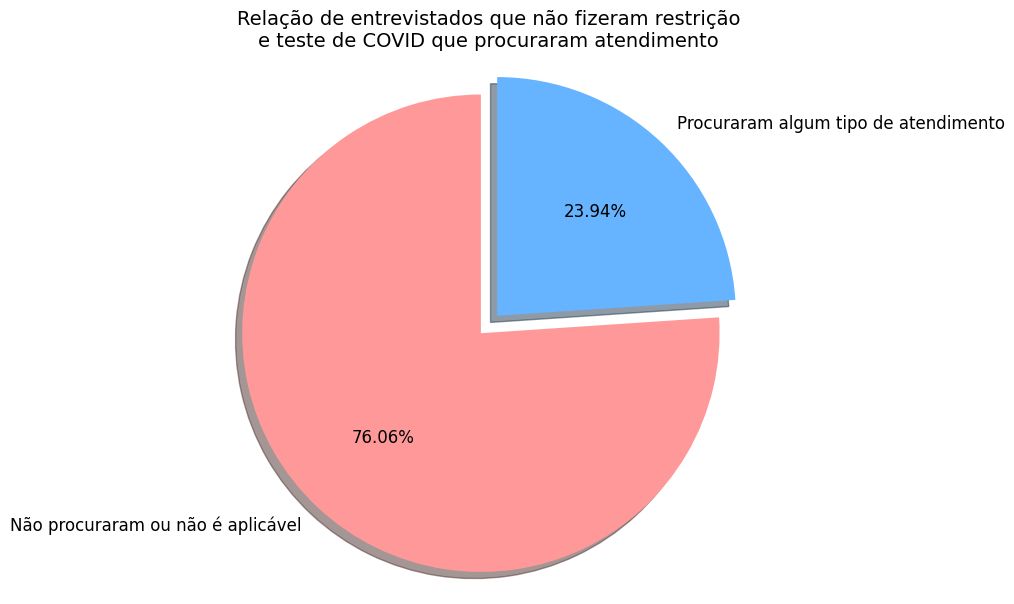

In [ ]:
labels = ['Não procuraram ou não é aplicável', 'Procuraram algum tipo de atendimento']
sizes = [76.06, 23.94]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Destaque para a primeira fatia

# Criação do gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})

# Adicionando título
plt.title('Relação de entrevistados que não fizeram restrição\ne teste de COVID que procuraram atendimento', fontsize=14)
plt.axis('equal')  # Assegura que o gráfico é um círculo

# Exibindo o gráfico
plt.show()


In [ ]:
Sintomas

{1: 'Na semana passada teve febre',
 2: 'Na semana passada teve tosse',
 3: 'Na semana passada teve dor de garganta',
 4: 'Na semana passada teve dificuldade para respirar',
 5: 'Na semana passada teve dor de cabeça',
 6: 'Na semana passada teve dor no peito',
 7: 'Na semana passada teve náusea',
 8: 'Na semana passada teve nariz entupido ou escorrendo',
 9: 'Na semana passada teve fadiga',
 10: 'Na semana passada teve dor nos olhos',
 11: 'Na semana passada teve perda de cheiro ou sabor',
 12: 'Na semana passada teve dor muscular',
 13: 'Na semana passada teve diarréia',
 14: 'Nenhum',
 'Nao_Aplicavel': 'Não aplicável'}